In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import time 
from IPython import display 

In [3]:
class particle:
    """docstring"""
 
    def __init__(self, x_len, y_len, dt):
        """Constructor"""
        x = np.random.random() * x_len
        y = np.random.random() * y_len
        vx = (np.random.random() - 0.5) / dt
        vy = (np.random.random() - 0.5) / dt
        self.pos = np.array([x,y])
        self.vel = np.array([vx,vy])
        
    def __str__(self):
        return 'Position: ' + str(self.pos) + '\n' + 'Velocity: ' + str(self.vel) + '\n'

In [4]:
def len_vec(v):
    return np.sqrt(sum(v**2))

In [5]:
def collide(a, b):
    collision = a.pos - b.pos
    distance = len_vec(collision)
    
    if (distance == 0.0):
        collision = np.array([1.0, 0.0])
        distance = 1.0
    
    collision = collision / distance
    aci = np.dot(a.vel, collision)
    bci = np.dot(b.vel, collision)
    
    acf = bci
    bcf = aci
 
    a.vel += (acf - aci) * collision
    b.vel += (bcf - bci) * collision
    
    return

In [6]:
def move(p, x_len, y_len):
    
    p.pos += p.vel
    
    if p.pos[0] > x_len or p.pos[0] < 0:
        p.vel[0] *= -1
        p.pos[0] += 2 * p.vel[0]
        
    if p.pos[1] > y_len or p.pos[1] < 0:
        p.vel[1] *= -1
        p.pos[1] += 2 * p.vel[1]
        
    return

In [7]:
fx = np.vectorize(lambda p: p.pos[0])
fy = np.vectorize(lambda p: p.pos[1])

In [8]:
def motion(N, time_total, x_len, y_len, dt, rad_inter):
    
    prts = [particle(x_len, y_len, dt) for i in range(N)]
    
    plt.figure(figsize=(x_len, y_len))
    
    for t in range(time_total):
        plt.clf()
        axes = plt.gca()
        axes.set_xlim([0, x_len])
        axes.set_ylim([0, y_len])        
        
        for i in range(N):
            for j in range(i+1, N):
                if len_vec(prts[i].pos - prts[j].pos) < rad_inter:
                    collide(prts[i], prts[j])
        
        for p in prts:
            move(p, x_len, y_len)
            
        plt.plot(fx(prts), fy(prts), '.', c='k')
    
        display.display(plt.gcf()) 
        display.clear_output(wait=True) 
    return

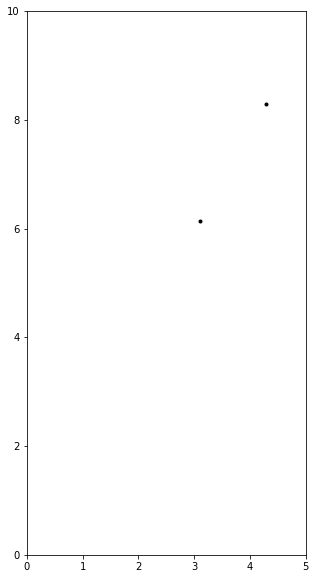

In [9]:
motion(N=2, time_total=100, x_len=5, y_len=10, dt=1, rad_inter=1)